In [215]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
%matplotlib inline
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
from scipy.stats import shapiro
from scipy.stats import normaltest

stud_0 = pd.read_csv('stud_math.csv')


def stat_dif(column): # Принимает столбец.
    cols = stud[column].value_counts().index
    # Получаем список возможных значений в стольбце.
    combinations_all = list(combinations(column, 2))
    # Получаем список возможных попарных комбинаций значений.
    for comb in combinations_all:
    # Берем одну комбинацию (пару) из списка комбинаций.
        if ttest_ind(stud.loc[stud[column] == comb[0], 'score'],
                     stud.loc[stud[column] == comb[1], 'score']).pvalue <= 0.05:
        # Проверка условия - вероятность ошибки меньше предельной (0.05)/число комбинаций(поправка Бонферони)
        # 1 атрибут - выбранный столбей фильтруем по значению первого элемента в паре [0] (комбинации).
        # 2 атрибут - выбранный столбей фильтруем по значению второго элемента в паре [1] (комбинации).
            print('Найдены статистически значимые различия между категориями колонки', column)
        else:
            print('Не найдено статистически значимых различий между категориями колонки', column) 


def abs_cat(x):         # Функция разбивающая весь диапазон значений 
    if x <= 3:          # количественной переменнойной  absences на 
        x = 'diligent'  # заданные диапазоны, и присваивающая имена
    elif x <= 10:       # этим диапазонам. Предназначена для создания
        x = 'normal'    # категориальной переменной из количественной.
    else:
        x = 'truant'
    return x


def win_los(x):       # Функвия для создания категориального столбца  
    if x < 2:         # на основе количественного столбца 'failures'.
        x = 'winner'  # Разбивает количество неудач на 2 большие категории:
    else:             # победители и неудачники.
        x = 'loser'   
    return x  


def show_box_stat(column):
    fig, ax = plt.subplots(figsize = (6, 6))
    sns.boxplot(x=column, y='score', data=stud)
    ax.set_title('Boxplot for ' + column)
    plt.show()
    print(stud.groupby(column).score.describe())
# Функция выводит диаграмму "ящик с усами" и основные статистики
# для каждого категориального столбца в отношении целевого параметра 'score'.
# В качестве аргумента принимает список категориальных столбцов.

### Данные хранящиеся в столбцах

1  **school** — аббревиатура школы, в которой учится ученик

2  **sex** — пол ученика ('F' - женский, 'M' - мужской)

3  **age** — возраст ученика (от 15 до 22)

4  **address** — тип адреса ученика ('U' - городской, 'R' - за городом)

5  **famsize** — размер семьи('LE3' <= 3, 'GT3' >3)

6  **Pstatus** — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

7  **Medu** — образование матери 
(0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

8  **Fedu** — образование отца 
(0- нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

9 **Mjob** — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

10 **Fjob** — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

11 **reason** — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

12 **guardian** — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

13 **traveltime** — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

14 **studytime** — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

15 **failures** — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

16 **schoolsup** — дополнительная образовательная поддержка (yes или no)

17 **famsup** — семейная образовательная поддержка (yes или no)

18 **paid** — дополнительные платные занятия по математике (yes или no)

19 **activities** — дополнительные внеучебные занятия (yes или no)

20 **nursery** — посещал детский сад (yes или no)

21 **higher** — хочет получить высшее образование (yes или no)

22 **internet** — наличие интернета дома (yes или no)

23 **romantic** — в романтических отношениях (yes или no)

24 **famrel** — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

25 **freetime** — свободное время после школы (от 1 - очень мало до 5 - очень мого)

26 **goout** — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

27 **healt** — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

28 **absences** — количество пропущенных занятий

29 **score** — баллы по госэкзамену по математике

In [216]:
stud_0.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,...,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,...,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,...,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,...,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,...,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


### Удаление столбца 'studytime, granular'.
Столбец 'studytime, granular' (время учебы) имеет отрицательные значения, что невозможно для времени. Кроме того все значения этого столбца распределены по 4 группам, это распределение полностью повторяет распределение значений в столбце 'studytime' с той только разницей, что значения в 'studytime, granular' умножены на -3. Столбец 'studytime, granular' просто искаженно повторяет столбец 'studytime' и не содержит никакой дополнительной информации. Этот столбец удаляем.

In [217]:
display(stud_0['studytime, granular'].value_counts(),
        stud_0['studytime'].value_counts())
# Сравниваем группировку значений в столбцах. 

-6.0     194
-3.0     103
-9.0      64
-12.0     27
Name: studytime, granular, dtype: int64

2.0    194
1.0    103
3.0     64
4.0     27
Name: studytime, dtype: int64

In [218]:
stud_0['studytime, granular'] = stud_0['studytime, granular']/-3 
# Изменяем столбец согласно предположению отличии столбцов на -3.
stud_0[['studytime','studytime, granular']].corr() 
# После изменения столбцы полностью коррелируют.

,studytime,"studytime, granular"
studytime,1.0,1.0
"studytime, granular",1.0,1.0


In [219]:
stud_0.drop('studytime, granular',axis = 1,inplace = True) # Удаляем ненужный столбец.
stud_0.columns # Проверяем исполнение.

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout',
       'health', 'absences', 'score'],
      dtype='object')

# Работа с типами данных, некорректными значениями и пропусками.
Из описания столбцов в задании нам известно, какие данные в них хранятся и какие значения могут принимать. Посмотрим, какие значения принимают переменные в каждом столбце, чтобы сразу исправить недопустимые для столбца значения.
## Некорректные значения.

In [220]:
for col in stud_0.columns:
    value = stud_0[col].unique()
    print(f'"{col}"   значения: {value}\n')

"school"   значения: ['GP' 'MS']

"sex"   значения: ['F' 'M']

"age"   значения: [18 17 15 16 19 22 20 21]

"address"   значения: ['U' nan 'R']

"famsize"   значения: [nan 'GT3' 'LE3']

"Pstatus"   значения: ['A' nan 'T']

"Medu"   значения: [ 4.  1.  3.  2. nan  0.]

"Fedu"   значения: [ 4.  1.  2.  3. 40. nan  0.]

"Mjob"   значения: ['at_home' 'health' 'other' 'services' 'teacher' nan]

"Fjob"   значения: ['teacher' 'other' nan 'health' 'services' 'at_home']

"reason"   значения: ['course' 'other' 'home' 'reputation' nan]

"guardian"   значения: ['mother' 'father' 'other' nan]

"traveltime"   значения: [ 2.  1.  3. nan  4.]

"studytime"   значения: [ 2.  3.  1. nan  4.]

"failures"   значения: [ 0.  3. nan  2.  1.]

"schoolsup"   значения: ['yes' 'no' nan]

"famsup"   значения: ['no' 'yes' nan]

"paid"   значения: ['no' nan 'yes']

"activities"   значения: ['no' 'yes' nan]

"nursery"   значения: ['yes' 'no' nan]

"higher"   значения: ['yes' nan 'no']

"internet"   значения: [nan 'ye

Обращает на себя внимание значение 40.0 в столбце Fedu. Этот параметр может принимать значения от 1 до 4. 40.0 - это похоже неверно записанная 4.0. Исправим эту запись.

In [221]:
stud_0.loc[stud_0.Fedu == 40.0, 'Fedu'] = 4.0 
# Присваиваем корректное значение.
stud_0.Fedu.value_counts()
# Проверяем.

2.0    106
3.0     96
4.0     89
1.0     78
0.0      2
Name: Fedu, dtype: int64

Обращает на себя внимание значение -1.0 в столбце famrel. Этот параметр может принимать значения от 1 до 4. -1.0 - это похоже неверно записанная 1.0. Исправим эту запись.

In [222]:
stud_0.loc[stud_0.famrel == -1, 'famrel'] = 1.0
# Присваиваем корректное значение.
stud_0.famrel.value_counts()
# Проверяем.

4.0    182
5.0     99
3.0     62
2.0     17
1.0      8
Name: famrel, dtype: int64

Остальные столбцы содержат только значения допустимые для своей переменной.

## Типы данных
На основании анализа описания столбцов данного в задании можно разделить все столбцы по следующим типам.


1. Столбцы с **количественными дискретными** типами данных: **age**, **failures**, **absences**, **score**.


2. Столбцы с **категориальными порядковыми** типами данных: **famsize**, **Medu**, **Fedu**, **traveltime**, **studytime**, **famrel**, **freetime**, **goout**, **health**.


3. Столбцы с **категориальными номинативными** типами данных: **school**, **sex**, **address**, **Pstatus**, **Mjob**, **Fjob**, **reason**, **guardian**, **schoolsup**, **famsup**, **paid**, **activities**, **nursery**, **higher**, **internet**, **romantic**.

In [223]:
stud_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      395 non-null    object 
 1   sex         395 non-null    object 
 2   age         395 non-null    int64  
 3   address     378 non-null    object 
 4   famsize     368 non-null    object 
 5   Pstatus     350 non-null    object 
 6   Medu        392 non-null    float64
 7   Fedu        371 non-null    float64
 8   Mjob        376 non-null    object 
 9   Fjob        359 non-null    object 
 10  reason      378 non-null    object 
 11  guardian    364 non-null    object 
 12  traveltime  367 non-null    float64
 13  studytime   388 non-null    float64
 14  failures    373 non-null    float64
 15  schoolsup   386 non-null    object 
 16  famsup      356 non-null    object 
 17  paid        355 non-null    object 
 18  activities  381 non-null    object 
 19  nursery     379 non-null    o

В датасете 11 столбцов типа float64 и один int64. Из описания столбцов в задании видно, что должно быть 4 количественных дискретных столбца, то есть типа int, а остальные категориальные. Для удобства работы приведем все float64 и int64 к типу int32. Приведением категориальных типов займемся позже.

In [224]:
float_int = ['age','Medu','Fedu','traveltime','studytime','failures',
             'famrel','freetime','goout','health','absences','score']
# Список столбцов с типом float64 и int64.
stud_0[float_int] = stud_0[float_int].astype('Int32')
# Приводим типы к int32.
stud_0.info() # Проверяем.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    Int32 
 3   address     378 non-null    object
 4   famsize     368 non-null    object
 5   Pstatus     350 non-null    object
 6   Medu        392 non-null    Int32 
 7   Fedu        371 non-null    Int32 
 8   Mjob        376 non-null    object
 9   Fjob        359 non-null    object
 10  reason      378 non-null    object
 11  guardian    364 non-null    object
 12  traveltime  367 non-null    Int32 
 13  studytime   388 non-null    Int32 
 14  failures    373 non-null    Int32 
 15  schoolsup   386 non-null    object
 16  famsup      356 non-null    object
 17  paid        355 non-null    object
 18  activities  381 non-null    object
 19  nursery     379 non-null    object
 20  higher    

## Пропуски.
В датасете 395 записей. Только первые 3 столбца не имеют пропусков, все остальные имеют различное количество пропусков.

In [225]:
round(stud_0[stud_0.columns].isnull().sum()/395*100,2)
# Количество пропусков  в процентах оругленное до 2 знаков после точки.

school         0.00
sex            0.00
age            0.00
address        4.30
famsize        6.84
Pstatus       11.39
Medu           0.76
Fedu           6.08
Mjob           4.81
Fjob           9.11
reason         4.30
guardian       7.85
traveltime     7.09
studytime      1.77
failures       5.57
schoolsup      2.28
famsup         9.87
paid          10.13
activities     3.54
nursery        4.05
higher         5.06
internet       8.61
romantic       7.85
famrel         6.84
freetime       2.78
goout          2.03
health         3.80
absences       3.04
score          1.52
dtype: float64

Критично большое количество пропусков только в 2 стольбцах: Pstatus и paid, поэтому после заполнения пропусков будем критично относиться к их влиянию на целевой показатель. 
### Заполнение пропусков в количественных столбцах.    
Пропуски в количественных столбцах заполним медианой, так как она не чувствительна к выбросам. С количественным столбцом **score** будем работать отдельно, так как это целевой показатель. Количественные столбцы содержащие пропуски:**failures** и **absences**.

In [226]:
stud_0['failures'].fillna(stud_0['failures'].median(), inplace = True)
stud_0['absences'].fillna(stud_0['absences'].median(), inplace = True)
# Заполняем пропуски медианой.
stud_0[['failures','absences']].isnull().sum()
# убеждаемся, что пропусков не осталось.

failures    0
absences    0
dtype: int64

### Заполнение пропусков в категориальных столбцах.
Категориальные столбцы имеют не так много пропусков, поэтому использовать трудоемкие способы заполнения пропусков, основанные на анализе зависимостей столбцов или пропорций значений в толбце, не будем. Заполнять пропуски во всех категориальных столбцах будем модой.

In [227]:
cat_col = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout',
       'health']
# выбираем категориальные столбцы.
for col in cat_col:
    stud_0[col].fillna(stud_0[col].mode()[0], inplace = True)
# Заполняем пропуски модой.

In [228]:
round(stud_0[stud_0.columns].isnull().sum()/395*100,2)
# После работы с пропусками снова проверим их наличие.

school        0.00
sex           0.00
age           0.00
address       0.00
famsize       0.00
Pstatus       0.00
Medu          0.00
Fedu          0.00
Mjob          0.00
Fjob          0.00
reason        0.00
guardian      0.00
traveltime    0.00
studytime     0.00
failures      0.00
schoolsup     0.00
famsup        0.00
paid          0.00
activities    0.00
nursery       0.00
higher        0.00
internet      0.00
romantic      0.00
famrel        0.00
freetime      0.00
goout         0.00
health        0.00
absences      0.00
score         1.52
dtype: float64

## Переименование столбцов.
Приведем названия всех столбцов к общему стилю.

In [229]:
stud_0.rename(columns={'Pstatus': 'p_status',
                        'Medu': 'm_edu',
                        'Fedu': 'f_edu',
                        'Mjob': 'm_job',
                        'Fjob': 'f_job'}, inplace=True)

In [230]:
stud_0.info() # Проверим работу по очистке датасета.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    Int32 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   p_status    395 non-null    object
 6   m_edu       395 non-null    Int32 
 7   f_edu       395 non-null    Int32 
 8   m_job       395 non-null    object
 9   f_job       395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    Int32 
 13  studytime   395 non-null    Int32 
 14  failures    395 non-null    Int32 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

## Целевой показатель - столбец  'score'
Столбец score - это целевой показатель, поэтому его очистку проведем отдельно.

Столбец 'scoere' содержит результаты госэкзамена по математике. Это целевой показатель. Для точности прогнозов он имеет важнейшее значение, поэтому заполнять отсутствующие значения какими-либо расчетными значениями и тем самым искажать целевой показатель не будем. Строки с отсутствующими значениями удаляем.

In [231]:
stud_0 = stud_0[stud_0.score.notnull()]  # Избавляемся от NaN переприсваивая переменную.
stud_0.score.isnull().sum()              # Проверяем, что пропусков не осталось.

0

Оценка по математике это количественная дискретная переменная. Оценим ее распределение на гистограмме.

<AxesSubplot:>

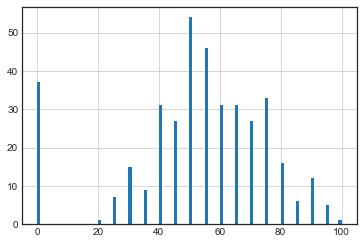

In [232]:
stud_0.score.hist(bins = 100)
# Система оценки стобальная - bins = 100.

На гистограмме виден выброс - нулевые оценки за экзамен.

In [233]:
stud_0.score.value_counts()

50     54
55     46
0      37
75     33
65     31
60     31
40     31
45     27
70     27
80     16
30     15
90     12
35      9
25      7
85      6
95      5
20      1
100     1
Name: score, dtype: Int64

Выброс составляет 37 нулевых значений. Несмотря на то, что 0 - это допустимое значение по шкале (от 0 до 100), считать оценку 0 реальной оценкой знаний обычногоо ученика, который учился вместе с остальными, не верно.

Проверим не обращают ли эти ученики на себя внимание по остальным показателям.

In [234]:
stud_0[stud_0.score == 0]

,school,sex,age,address,famsize,p_status,m_edu,f_edu,m_job,f_job,...,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
128,GP,M,18,R,GT3,T,2,2,other,other,...,yes,yes,yes,no,3,3,3,4,0,0
130,GP,F,15,R,GT3,T,3,4,services,teacher,...,yes,yes,yes,yes,4,2,2,5,0,0
131,GP,F,15,U,GT3,T,1,1,at_home,other,...,no,yes,yes,yes,4,3,3,4,0,0
134,GP,M,15,R,GT3,T,3,4,at_home,teacher,...,yes,yes,no,yes,5,3,3,5,0,0
135,GP,F,15,U,GT3,T,4,4,services,other,...,yes,yes,yes,yes,4,3,3,5,0,0
136,GP,M,17,R,GT3,T,3,4,at_home,other,...,yes,yes,no,no,4,4,5,5,0,0
137,GP,F,16,U,GT3,A,3,2,other,other,...,no,yes,yes,yes,4,3,2,5,0,0
140,GP,M,15,U,GT3,T,4,3,teacher,services,...,yes,yes,yes,no,2,2,2,3,0,0
144,GP,M,17,U,GT3,T,2,1,other,other,...,yes,yes,yes,no,5,4,5,5,0,0
146,GP,F,15,U,GT3,T,3,2,health,services,...,yes,yes,yes,no,3,3,2,3,0,0


В выборке учеников с нулевой оценкой обращает на себя внимание только то, что у них нет пропусков занятий (0 в колонке absences), то есть они не были прогульщиками. Судя по остальным параметрам - это были обычные ученики. Ноль могли поставить им за неявку на экзамен, нарушение правил проведения экзамена и т.п.

Если оставить нулевые баллы, то они будут сильно искажать реальную картину успеваемости по математике. Заменять их средним или медианой не будем, так как это целевой показатель - искажать его нельзя. Удаляем записи с нулевой оценкой несмотря на то, что это значительно уменьшает размер данных для построения модели.

<AxesSubplot:>

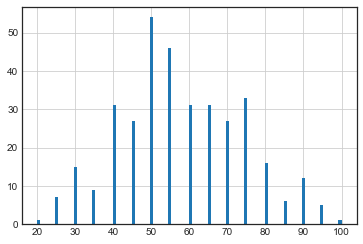

In [235]:
stud = stud_0[stud_0.score != 0] 
# Избавляемся от нулевых значений переприсваивая переменную.
stud.score.hist(bins = 100)
# Снова смотрим распределение.

После удаления выбросов гистограмма столбца score "с натяжкой" напоминает форму нормального распределения, онон немного смещено влево.

count    352.000000
mean      57.755682
std       16.200928
min       20.000000
25%       45.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

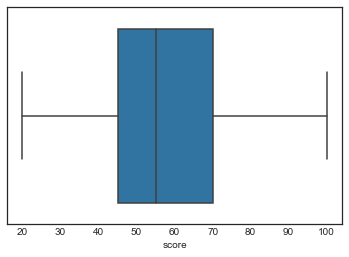

In [236]:
sns.boxplot( x='score', data=stud)
stud.score.describe()

По описательным статистикам и ящику с усами видно, что средее немного больше медианы, то есть распределение не совсем симметричное.
 
 Проверим данные в столбце score на нормальность с помощью статистических тестов.

### Тест Шапиро-Уилка

In [237]:
test1 = stat, p = shapiro(stud.score)
print(test1)
# Интерпретация теста.
alpha = 0.05  # Принимаем уровень значимости 0.05
if p > alpha:
    print('Распределение похоже на нормальное. Нулевая гипотеза не отвергнута')
else:
    print('Распределение не похоже на нормальное. Нулевая гипотеза отвергнута')

ShapiroResult(statistic=0.9814924597740173, pvalue=0.0001710323995212093)
Распределение не похоже на нормальное. Нулевая гипотеза отвергнута


### Тест д'Агостино

In [238]:
test2 = stat, p = normaltest(stud.score)
print(test2) 
# Интерпретация теста.
alpha = 0.05  # Принимаем уровень значимости 0.05
if p > alpha:
    print('Распределение похоже на нормальное. Нулевая гипотеза не отвергнута')
else:
    print('Распределение не похоже на нормальное. Нулевая гипотеза отвергнута')

NormaltestResult(statistic=5.920251504458122, pvalue=0.05181240123808908)
Распределение похоже на нормальное. Нулевая гипотеза не отвергнута


Резюмируя исследование столбца score, можно сказать, что распределение успеваемости нельзя уверенно назвать нормальным. Однако можно использовать методы статистического анализа предназначенные для нормального распределения относясь к результатам такого анализа с некоторой настороженностью.

### Столбец 'age'
Количественная дискретная переменная. Для оценки связи возраста с успеваемостью посмотрим их корреляцию.

In [239]:
round(stud[['score','age']].corr(),2)

,score,age
score,1.00,-0.13
age,-0.13,1.00


Корреляция возраста и успеваемости имеет низкое значение, а значит влияние возраста на успеваемость не значительно.

Попробуем проверить это утверждение по-другому. Исходя из смысла исследования, учеников по возрасту отбирали не случайно, а брали в каждом классе (возрасте) в равной мере. Заполненность классов как правило полная, поэтому учеников разного возраста должно быть примерно одинаково. Это значит, что, распределение исследуемых по возрасту не должно быть нормальным или смещенным в сторону какого-либо возраста. Данная переменная в нашем исследовании носит скорее категориальный характер: каждый возраст - это класс школы (год обучения). Преобразуем этот столбец в категориальный порядковый. При этом есть одно соображение: в датасете имеютс малочисленные значения возраста 19 - 22 года. В школе учатся до 17, максимум до 18 лет. Школьники старше 18 лет - это исключения не типичные для школы (второгодники, долго болеющие, соц. неблагополучные), поэтому объединим всех старше 18 лет в одну группу.

16    96
17    90
15    76
18    69
19    16
20     3
21     1
22     1
Name: age, dtype: Int64

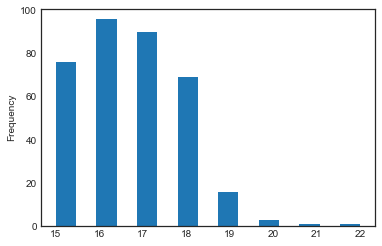

In [240]:
stud.age.plot(kind = 'hist', bins = 15) # На гистограмме возрас 20,21 и 22 стоят особняком 
stud.age.value_counts()                 # и обращают на себя внимание малым количеством.

 Создадим новый столбец **age_cat**, в котором будут следующие группы: 15 лет, 16 лет, 17 лет, 18 лет, старше 18 лет.

<ipython-input-241-6318a2211a08>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stud['age_cat'] = stud['age'].copy()   # Создаем столбец-копию.


age_cat
15     76
16     96
17     90
18     69
18+    21
Name: age_cat, dtype: int64

CategoricalDtype(categories=['15', '16', '17', '18', '18+'], ordered=True)

<AxesSubplot:xlabel='age_cat'>

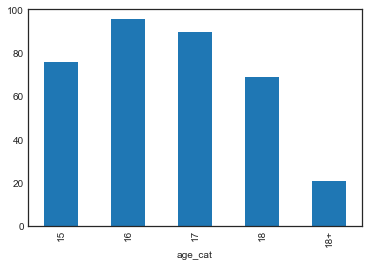

In [241]:
stud['age_cat'] = stud['age'].copy()   # Создаем столбец-копию.
stud = stud.replace({'age_cat':{15:'15', 16:'16', 17:'17', 18:'18',  
                                19:'18+', 20:'18+', 21:'18+', 22:'18+'}})
# Распределяем числовые значения по категориям.
stud['age_cat'] = stud['age_cat'].astype('category').cat.as_ordered()
# Переводим тип нового столбца в категори.cat.as_ordered()альный порядковый.
display(stud.groupby('age_cat').age_cat.count(), stud.age_cat.dtype)
stud.groupby('age_cat').age_cat.count().plot(kind = 'bar')
# Проверяем результат.

Проверим влияние возраста на успеваемость в категориальном столбце age_cat.

,count,mean,std,min,25%,50%,75%,max
age_cat,,,,,,,,
15,76.0,60.723684,17.237632,25.0,50.0,60.0,75.0,95.0
16,96.0,59.218750,15.998818,25.0,50.0,57.5,70.0,100.0
17,90.0,55.944444,15.594843,20.0,45.0,55.0,65.0,90.0
18,69.0,56.014493,16.462518,25.0,45.0,55.0,70.0,95.0
18+,21.0,53.809524,13.684367,35.0,45.0,55.0,65.0,90.0


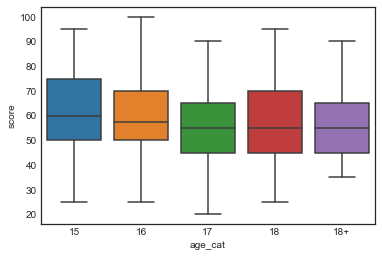

In [242]:
sns.boxplot(x='age_cat', y='score', data=stud)
stud.groupby('age_cat').score.describe()

Анализ категориального столбца так же не выявил значимого влияния возраста на успеваемость.  

In [243]:
stat_dif('age_cat')
# Используем ранее написанную функцию для проверки 
# статистически значимых различий между различными категориями в столбце.

Не найдено статистически значимых различий между категориями колонки age_cat
Не найдено статистически значимых различий между категориями колонки age_cat
Не найдено статистически значимых различий между категориями колонки age_cat
Не найдено статистически значимых различий между категориями колонки age_cat
Не найдено статистически значимых различий между категориями колонки age_cat
Не найдено статистически значимых различий между категориями колонки age_cat
Не найдено статистически значимых различий между категориями колонки age_cat
Не найдено статистически значимых различий между категориями колонки age_cat
Не найдено статистически значимых различий между категориями колонки age_cat
Не найдено статистически значимых различий между категориями колонки age_cat
Не найдено статистически значимых различий между категориями колонки age_cat
Не найдено статистически значимых различий между категориями колонки age_cat
Не найдено статистически значимых различий между категориями колонки age_cat

**Вывод. Параметр возраст не влияет на успеваемость, поэтому не будет использоваться для построения модели.**

### Столбец 'absences'
Столбец содержит 2 значения, которые в принципе не возможны: 385 и 212. Столько занятий по математике за целый год не наберется. Это явно выбросы, удаляем их.

In [244]:
stud.groupby('absences').absences.count()

absences
0      74
1       3
2      60
3       7
4      62
5       5
6      30
7       6
8      20
9       3
10     17
11      2
12     12
13      2
14     12
15      2
16      7
17      1
18      5
19      1
20      4
21      1
22      3
23      1
24      1
25      1
26      1
28      1
30      1
38      1
40      1
54      1
56      1
75      1
212     1
385     1
Name: absences, dtype: int64

In [245]:
stud = stud[stud.absences < 200]

<AxesSubplot:>

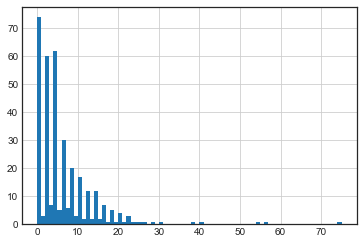

In [246]:
stud.absences.hist(bins = 75)

Распределение количества прогулов в нашей выборке совершенно точно не является нормальным, поэтому проверять в нем наличие выбросов с помощью ящика с усами, межквартильного промежутка нет смысла.

Проверим корреляцию количества прогулов и успеваемости.

In [247]:
stud[['absences','score']].corr()

,absences,score
absences,1.000000,-0.214358
score,-0.214358,1.000000


**Корреляция отрицательная, но не очень высокая. Этот столбец претендент для включения в модель.**

### Столбец 'failures'
Сильнее всего коррелирует с успеваемостью количество внеучебных неудач (-0.28). Однако это очень субъективный показатель, что считать неудачей заслуживающей внимания зависит от ососбенностей характера, то есть он скорее косвенно характеризует личность ученика.

Четкой тенденции зависимости успеваемости от неудач на графике не заметно. Имеющие 3 неудачи успевают так же, как и с двумя. Сомнительным кажется ограничение количества неудач тремя, неужели больше 3 неудач не бывает? Кроме того количество учеников с 3 и 4 неудачами слишком мало, чтобы можно было доверять статистике по ним.

In [248]:
stud[['failures','score']].corr()

,failures,score
failures,1.000000,-0.283415
score,-0.283415,1.000000


,count,mean,std,min,25%,50%,75%,max
failures,,,,,,,,
0,292.0,59.674658,15.935231,25.0,50.00,57.5,70.00,100.0
1,38.0,50.526316,13.294455,25.0,40.00,50.0,60.00,90.0
2,10.0,44.000000,16.633300,20.0,36.25,42.5,48.75,75.0
3,10.0,41.500000,8.834906,25.0,35.00,42.5,50.00,50.0


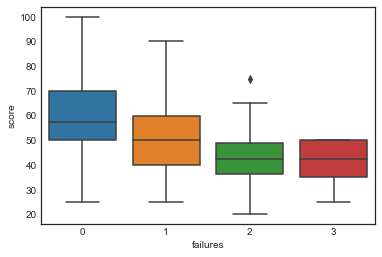

In [249]:
sns.boxplot(x='failures', y='score', data=stud)
stud.groupby('failures').score.describe()

**Корреляция отрицательная, но не очень высокая. Этот столбец претендент для включения в модель.**

## Анализ влияния категориальных признаков на успеваемость.
В нашем датасете есть несколько категориальных порядковых столбцов, значения которых обозначены числами. Понимая условность такого анализа попытаемся проверить корреляцию этих столбцов между собой и со столбцом score. Это может дать интересную информацию.

In [250]:
round(stud[['m_edu','score','f_edu','traveltime','studytime',
                      'famrel','freetime','goout','health',]].corr(), 2)

,m_edu,score,f_edu,traveltime,studytime,famrel,freetime,goout,health
m_edu,1.00,0.18,0.57,-0.16,0.07,-0.01,0.02,0.07,-0.06
score,0.18,1.00,0.12,-0.07,0.14,0.05,-0.01,-0.17,-0.08
f_edu,0.57,0.12,1.00,-0.12,-0.01,-0.01,-0.04,0.04,-0.02
traveltime,-0.16,-0.07,-0.12,1.00,-0.10,-0.03,-0.02,0.04,-0.02
studytime,0.07,0.14,-0.01,-0.10,1.00,0.05,-0.13,-0.03,-0.07
famrel,-0.01,0.05,-0.01,-0.03,0.05,1.00,0.15,0.03,0.11
freetime,0.02,-0.01,-0.04,-0.02,-0.13,0.15,1.00,0.29,0.07
goout,0.07,-0.17,0.04,0.04,-0.03,0.03,0.29,1.00,-0.01
health,-0.06,-0.08,-0.02,-0.02,-0.07,0.11,0.07,-0.01,1.00


Анализируя полученные корреляции можно отметить, что сильная корреляция отмечается только между образованием родителей (0.57). С успеваемостью силльной корреляции нет ни у одного столбца, но сильнее других влияют:m_edu (0.18), f_edu (0.12), studytime (0.14) и goout (-0.17). 

### Анализ влияния категориальных признаков на успеваемость.

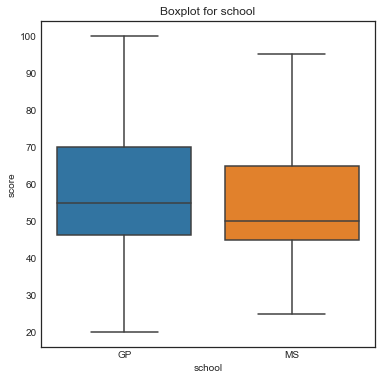

        count       mean        std   min    25%   50%   75%    max
school                                                             
GP      310.0  58.129032  16.237003  20.0  46.25  55.0  70.0  100.0
MS       40.0  54.500000  15.433895  25.0  45.00  50.0  65.0   95.0


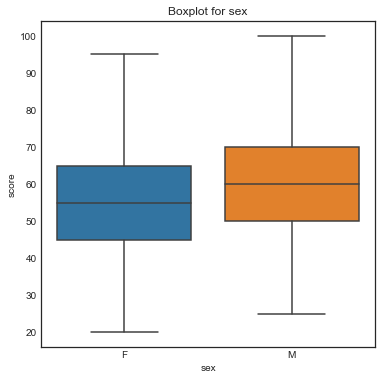

     count       mean        std   min   25%   50%   75%    max
sex                                                            
F    181.0  55.994475  15.867681  20.0  45.0  55.0  65.0   95.0
M    169.0  59.556213  16.328422  25.0  50.0  60.0  70.0  100.0


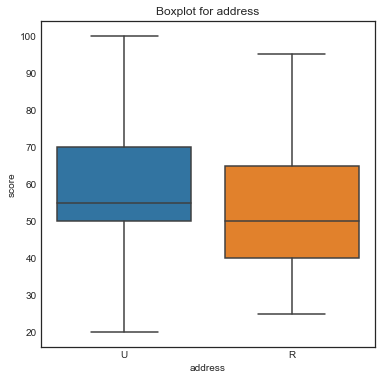

         count       mean        std   min   25%   50%   75%    max
address                                                            
R         73.0  53.356164  16.203026  25.0  40.0  50.0  65.0   95.0
U        277.0  58.862816  15.989896  20.0  50.0  55.0  70.0  100.0


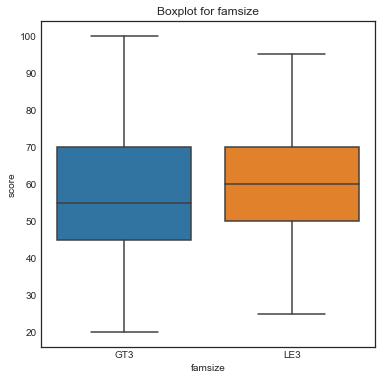

         count       mean        std   min   25%   50%   75%    max
famsize                                                            
GT3      251.0  57.350598  16.163310  20.0  45.0  55.0  70.0  100.0
LE3       99.0  58.636364  16.222594  25.0  50.0  60.0  70.0   95.0


ValueError: Could not interpret input 'Pstatus'

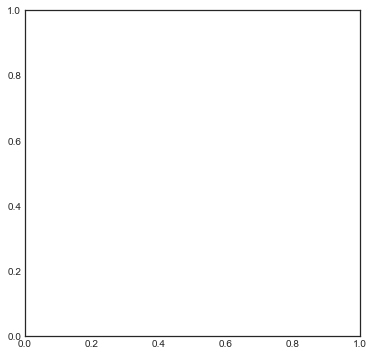

In [251]:
for col in cat_col:       
    show_box_stat(col)  
# Функция show_box_stat была определена в первой ячейке.

### school +
Именно в школе получают основные знания по математике. Уровень преподавания математики в школах различный: в лицее - высокий, в общеобразовательной школе - ниже. К сожалению в задании нет расшифровки аббревиатур школ GP и MS.

Диаграмма показывает различный уровень успеваемости в школах GP и MS.

### sex +
График показывает более высокий уровень оценок по математике у мальчиков. 

### address +
Уровень развития образования в городе выше чем в сельских школах. Это подтверждает существенная разница показателей успеваемости городских и сельских учеников.

### famsize +
В малых семьях успеваемость выше. Родители больше внимания уделяют ребенку, и у ребенка больше возможностей заниматься учебой. 

### p_edu и m_edu +
При анализе успеваемости в зависимости от уровня образования отца и матери можно отметить:

1) успеваемость совершенно одинаково зависит как от образования отца так и от образования матери;

2) есть четкая тенденция, выше образование родителей - выше успеваемость;

3) нет разницы в успеваемости детей, родители которых имеют незаконченное и законченное среднее образование;

4) высокий уровень успеваемости детей, родители которых не имеют образования (такий наблюдений очень мало - не достоверно).

Создадим столбец, который учитывал бы образование и отца и матери, они в равной степени влияют на успеваемость ученика. Просто использовать один из столбцов f_edu или m_edu было бы не верно, так как уровень образования родителей в одной семье различен. В итоговом столбце будем оставлять уровень образования наиболее образованного родителя. Значения незеконченного среднего образования (9 классов) и законченного среднего (11 классов или колледж) объединим в одно значение - среднее образование.

In [252]:
stud['m_edu_tmp'] = stud['m_edu'].apply(lambda x: str(x))
stud['f_edu_tmp'] = stud['f_edu'].apply(lambda x: str(x))
# Временные столбцы для создания суммарного строкового столбца.
stud['p_edu'] = stud['m_edu_tmp'] + stud['f_edu_tmp']
# Столбец отражающий образование и отца и матери - образованность семьи.
stud.drop(['m_edu_tmp','f_edu_tmp'],axis = 1,inplace = True) 
# Удаляем ненужные временные столбцы.
stud.p_edu = stud.p_edu.apply(lambda x: x[0] if x[0]>x[1] else x[1])
# Оставляем значение только наиболее образованного родителя.
stud = stud.replace({'p_edu':{'0':'0','1':'elementary','2':'middle',
                              '3':'middle','4':'univer'}})
# Переименовываем столбцы и объединяем неполное и полное среднее образование.
stud.p_edu = stud.p_edu.astype('category').cat.as_ordered()
# Приводим столбец к нужному типу - категориальный порядковый.

<AxesSubplot:xlabel='p_edu', ylabel='score'>

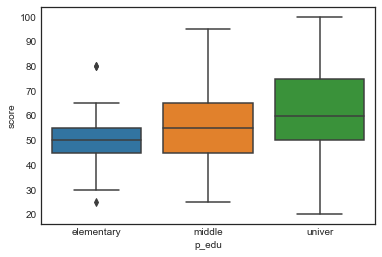

In [253]:
sns.boxplot(x='p_edu', y='score', data=stud)

В новом столбце зависимость успеваемости ученика от уровня образованности родителей прослеживается очень четко. В семье с более образованными родителями образование является ценностью, и это транслируется в сознание детей.

### m_job и f_job -
Данные признаки хоть и показывают какое-то влияние на успеваемость, имеют сомнительную ценность. В категориях смешаны конкретные профессии (например, учитель - специалист с высшим образованием), сферы деятельности (например, здравоохранение), в которых могут быть заняты люди разных профессий и уровня образования, и место работы (например, на дому), которое вообще ни о чем не говорит: ни о сфере деятельности, ни об урвне образования, ни о том, работает ли родитель в принципе. Эти два столбца не содержат какого-либо определенного признака, который можно было бы отслеживать. 

Если учитывать в этих столбцах только сферу деятельности, то и это будет неправильным, так как в столбцах указаны только 3 определенные сферы деятельности, причем не самые многочисленные по числу занятых в них работников. Большое число сфер деятельности просто записаны в другие.
 

### reason -
При анализе влияния на успеваемость мотивов родителей при выборе школы выделяется только мотив - репутация школы, во всех остальных случаях разницы нет.  

### guardian  -
Обращает на себя внимание, что отличия в успеваемости в зависимости от опекуна есть, но они не очень значительные. Группа учеников, опекуном которых являются не родители слишком мала, чтобы считать достоверной разницу в успеваемости.

### traveltime -
Длительность пути до школы более часа заметно снижает успеваемость, в остальных случаях разницы нет. Однако учеников, у которых путь до школы составляет более часа всего 7 человек (в этой группе еще 2 выброса). Эту разницу нельзя считать достоверной.

### studytime +
Чем больше дополнительно занимается ученик по математике, тем лучше результаты, но только если занятий более 5 часов в неделю. Создадим новый столбец, в котором объединим категории менее 5 часов занятий в неделю.

In [254]:
stud['studytime_1'] = stud['studytime'].copy()
# Создаем копию-столбец.
stud = stud.replace({'studytime_1':{1:'2-5',2:'2-5',3:'5-10',4:'>10'}})
# Переименовываем столбцы и объединяем 1 и 2 категории.
stud.studytime_1 = stud.studytime_1.astype('category').cat.as_ordered()
# Приводим столбец к нужному типу - категориальный порядковый.

<AxesSubplot:xlabel='studytime_1', ylabel='score'>

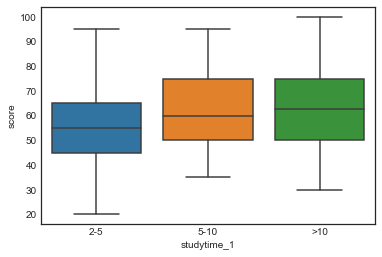

In [255]:
sns.boxplot(x='studytime_1', y='score', data=stud)

### schoolsup +
Отмечается выраженноя отрицательная связь наличия дополнительных занятий в школе. Необходимость в дополнительных занятиях - это следствие плохой успеваемости. 

### higher +-
Среди тех, кто планирует получать высшее образование, успеваемость выше. Однако группа не планирующих учиться в ВУЗе слишко малочисленна, поэтому разница в успеваемости не совсем достоверна.

### famrel, freetime, goout, health
Значения в этих столбцах основаны на субъективной оценке самого ученика. Значения в шкале от 1 до 5 для одного ученика это совсем не то, что у другого. Использовать значения в таких шкалах для группировки по категориям и оценки их влияния на целевой показатель не совсем корректно.

Единственный показатель из них, который можно было бы использовать - это health. Однако нужно уточнить, что это будет не текущее состояние здоровья, которое может определить врач, а **самочувствие**, которое по сути является субъективным. Выделять 5 градаций для такого признака нет смысла. Разумно выделить в этом критерии 2 группы: нормальное самочувствие, когда ученика ничего не бесспокоит, и плохое, когда что-то бесспокоит. Создадим новый столбец: bad и normal.
### health +

In [256]:
stud['health_1'] = stud['health'].copy()
# Создаем копию-столбец.
stud = stud.replace({'health_1':{1:'normal',2:'normal',3:'bad',4:'bad',5:'bad'}})
# Переименовываем столбцы и объединяем 1 и 2 категории.
stud.health_1 = stud.health_1.astype('category')
# Приводим столбец к нужному типу - категориальный.

,count,mean,std,min,25%,50%,75%,max
health_1,,,,,,,,
bad,269.0,56.505576,15.461223,25.0,45.0,55.0,65.0,95.0
normal,81.0,61.728395,17.838871,20.0,50.0,65.0,75.0,100.0


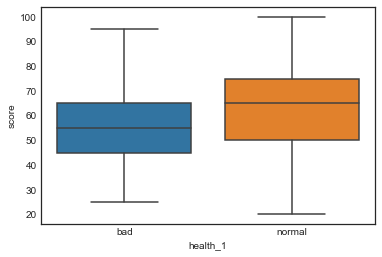

In [257]:
sns.boxplot(x='health_1', y='score', data=stud)
stud.groupby('health_1').score.describe()

Столбец goout включим в список кандидатов для модели, так как он показывал более сильную корреляцию с успеваемостью по сравнению со многими другими столбцами.

### Отбор столбцов и выводы.
После анализа влияния всех показателей в датасете на успеваемость по математике можно отобрать следующие 11 наиболее сильно влияющих столбцов: 'school', 'sex', 'address', 'famsize', 'p_edu', 'failures', 'absences', 'studytime_1',  'health_1',  'schoolsup' 'goout'.



'sex', 'failures', 'health_1' - характеризуют самого ученика.

'famsize', 'p_edu' - характеризуют семью ученика.

'school', 'address' - характеризуют школу.

'absences', 'studytime_1' - характеризуют время посвященное изучению математики в школе и дома.

'schoolsup' - этот показатель отражает реакцию школы на слабые показатели в течение года.

Причем **не все эти столбцы будут одинаково значимы для будущей модели.**

Столбцы: 'absences', 'failures', 'p_edu', 'studytime_1' носят объективный характер, их влияние на успеваемость подтверждает корреляционный анализ, поэтому для будущей модели они **будут иметь большее значение.

Столбцы: 'sex', 'school', 'address', 'famsize' носят объективный характер, но **их влияние на успеваемость подтверждена только анализом графиков.

Столбцы: 'health_1' и 'goout' носят субъективный характер и **сильно полагаться на них не стоит.

Столбец 'schoolsup' **имеет малое прогностическое значение**, так как является не причиной, а следствием плохой успеваемости. А наша модель должна предсказывать возможные проблемы с учебой.

In [258]:
stud.reset_index(drop=True, inplace=True)
# Упорядочим индексы после очистки датасета.

In [265]:
stud = stud.replace({'famsize':{'LE3':'2-3','GT3':'4-5'}})
# Переименуем значения для задания порядка в категориальном столбце.

In [266]:
col = ['sex','famsize','school','address','schoolsup','goout']
stud[col] = stud[col].astype('category')
# Приводим тип к категориальному.

In [267]:
stud.famsize = stud.famsize.cat.as_ordered() # Задаем порядок в категориальном столбце.
stud.famsize.unique()#dtype  # Проверяем.

['4-5', '2-3']
Categories (2, object): ['2-3' < '4-5']

In [268]:
stud.goout = stud.goout.cat.as_ordered() # Задаем порядок в категориальном столбце.
stud.goout.dtype  # Проверяем.
stud['goout'].unique()

[4, 3, 2, 1, 5]
Categories (5, object): [1 < 2 < 3 < 4 < 5]

#### Создадим датасет состоящий только из отобранных стольбцов.

In [269]:
select = stud[['absences','failures','p_edu','studytime_1','sex','school',
               'address','famsize','health_1','goout','schoolsup','score']]
select.head(10)

,absences,failures,p_edu,studytime_1,sex,school,address,famsize,health_1,goout,schoolsup,score
0,6,0,univer,2-5,F,GP,U,4-5,bad,4,yes,30
1,4,0,elementary,2-5,F,GP,U,4-5,bad,3,no,30
2,10,3,elementary,2-5,F,GP,U,2-3,bad,2,yes,50
3,2,0,univer,5-10,F,GP,U,4-5,bad,2,no,75
4,4,0,middle,2-5,F,GP,U,4-5,bad,2,no,50
5,10,0,univer,2-5,M,GP,U,2-3,bad,2,no,75
6,0,0,middle,2-5,M,GP,U,2-3,bad,4,no,55
7,6,0,univer,2-5,F,GP,U,4-5,normal,4,yes,30
8,0,0,middle,2-5,M,GP,U,2-3,normal,2,no,95
9,0,0,univer,2-5,M,GP,U,4-5,bad,1,no,75


In [270]:
select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   absences     350 non-null    Int32   
 1   failures     350 non-null    Int32   
 2   p_edu        350 non-null    category
 3   studytime_1  350 non-null    category
 4   sex          350 non-null    category
 5   school       350 non-null    category
 6   address      350 non-null    category
 7   famsize      350 non-null    category
 8   health_1     350 non-null    category
 9   goout        350 non-null    category
 10  schoolsup    350 non-null    category
 11  score        350 non-null    Int32   
dtypes: Int32(3), category(9)
memory usage: 9.5 KB
